# Twitter Sentiment Analysis using NLP and Machine Learning
Dataset: Sentiment140 (Twitter Data)
Model: Logistic Regression with TF-IDF

In [1]:

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load Dataset

In [3]:

df = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    encoding='latin-1',
    header=None
)

df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]

print(df['target'].value_counts())
df.head()


target
0    800000
4    800000
Name: count, dtype: int64


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Convert Target Labels (4 → 1)

In [4]:

df['target'] = df['target'].replace(4, 1)
print(df['target'].value_counts())


target
0    800000
1    800000
Name: count, dtype: int64


## Handle Missing Values

In [5]:

df['text'] = df['text'].astype(str)


## Text Cleaning

In [6]:

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


## Train-Test Split (Stratified)

In [7]:

X = df['clean_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## TF-IDF Vectorization

In [8]:

vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## Model Training

In [9]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)


## Model Evaluation

Accuracy: 0.774190625

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



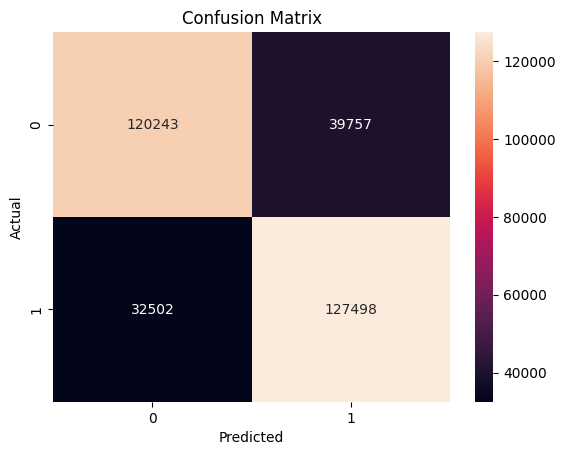

In [10]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Sample Prediction

In [11]:

sample = ["I love this product, it is amazing!"]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)

if prediction[0] == 1:
    print("Positive Sentiment 😊")
else:
    print("Negative Sentiment 😡")


Positive Sentiment 😊
